In [176]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [177]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
df = dfLE.copy()                                        # Create duplicate of data
df.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
df.dropna(inplace=True)
df.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [178]:
print(df.columns)
df.sample(10)

Index(['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population',
       'Schooling'],
      dtype='object')


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
162,Suriname,0.0,70.08125,166.0000,0.0000,4.984000,85.272727,0.0000,50.15625,0.0000,78.2500,82.5625,1.085490e+09,1.909166e+05,11.82500
173,TrinidadandTobago,0.0,71.06875,163.3750,0.0000,6.044667,54.928571,0.0000,37.73125,0.2500,76.4375,66.5000,6.648803e+09,7.761331e+05,12.33125
68,Guatemala,0.0,71.73125,131.1875,13.1250,2.268667,87.090909,0.0000,40.44375,16.1250,71.4375,85.5625,1.769152e+10,5.933908e+06,9.86250
81,Israel,0.0,81.30000,59.5000,0.9375,2.497333,97.437500,138.9375,54.98750,1.0000,94.2500,89.0000,6.559575e+08,2.786288e+04,15.71250
83,Jamaica,0.0,74.29375,141.2500,1.0000,3.624000,83.153846,0.1875,45.42500,1.0000,89.6250,89.3125,3.356012e+09,1.500309e+06,12.27500
80,Ireland,1.0,80.15000,72.4375,0.0000,12.654000,86.833333,174.5000,53.68750,0.0000,86.1250,86.1250,1.170433e+11,3.599795e+06,17.65625
31,CentralAfricanRepublic,0.0,48.51250,333.0625,16.5000,1.231333,42.571429,699.4375,17.08750,24.5000,41.3125,42.4375,7.638220e+08,2.016546e+06,6.23750
164,Sweden,1.0,82.51875,59.1875,0.0000,6.926667,59.200000,18.9375,56.25000,0.0000,98.3125,98.3125,1.784113e+11,5.514868e+06,15.86875
126,Pakistan,0.0,64.50000,154.0000,367.9375,0.026000,67.307692,3842.3125,18.31250,461.0000,64.1875,70.8750,6.982217e+10,6.902796e+07,6.71875
70,Guinea-Bissau,0.0,55.36875,158.3125,4.5625,2.260000,75.000000,331.3125,19.43125,7.3125,74.7500,65.2500,3.608703e+08,9.818832e+05,8.28750


In [179]:
Population=df['Population']
Population=np.log(Population)
Population.head()

0    16.115318
1    13.454414
2    16.890508
3    16.132698
5    16.817285
Name: Population, dtype: float64

In [180]:
GDP=df['GDP']
lnGDP=np.log(GDP)
lnGDP.head()

0    22.143172
1    20.877649
2    25.019952
3    23.804182
5    25.824095
Name: GDP, dtype: float64

In [181]:
#Part 1
df['GDPPerCapita']=GDP/Population
df.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,2.566958e+08
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,8.673269e+07
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,4.348949e+09
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,1.349951e+09
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,9.761263e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

array([[<AxesSubplot:title={'center':'isDeveloped'}>,
        <AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'under-fivedeaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDPPerCapita'}>, <AxesSubplot:>]],
      dtype=object)

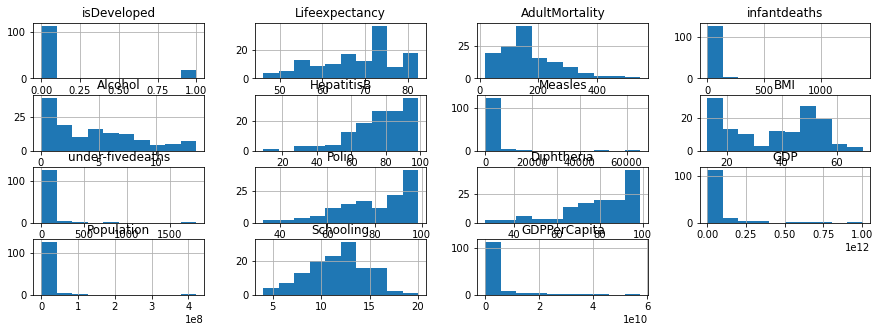

In [182]:
df.hist()

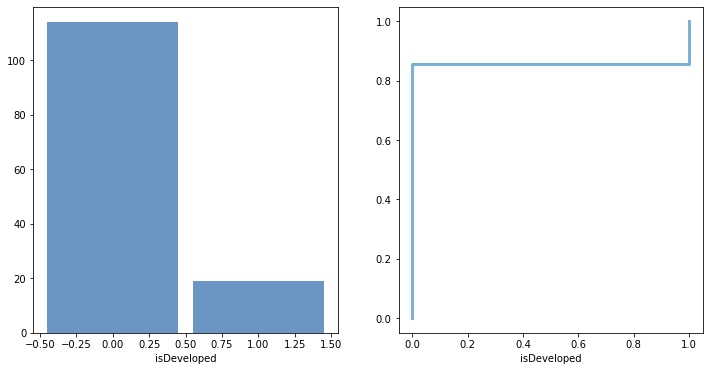

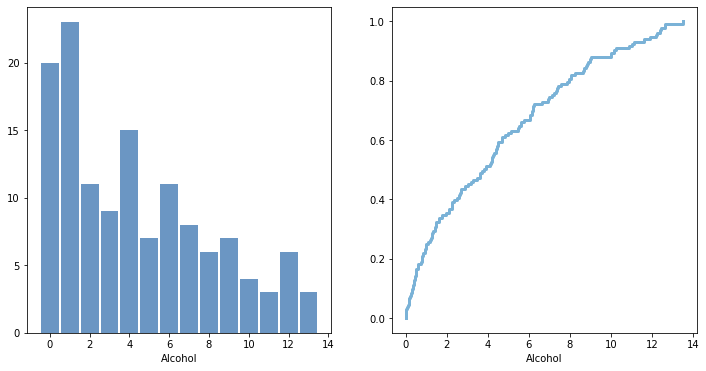

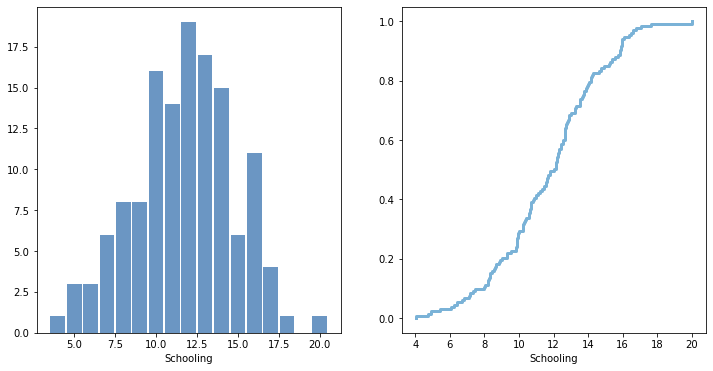

<Figure size 576x432 with 0 Axes>

In [183]:
from cProfile import label


col1=['isDeveloped','Alcohol','Schooling']

i=0
while i < len(col1):
    h = col1[i]
    hist=thinkstats2.Hist(round(df[h],0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show(xlabel=h)
    i = i + 1




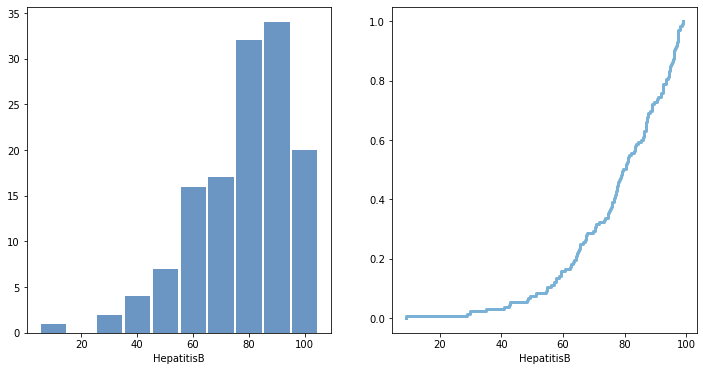

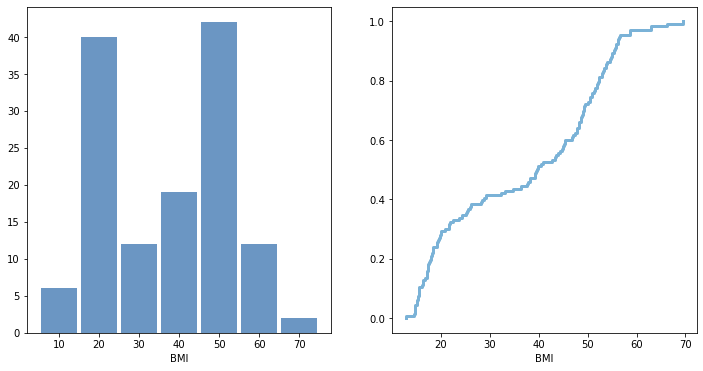

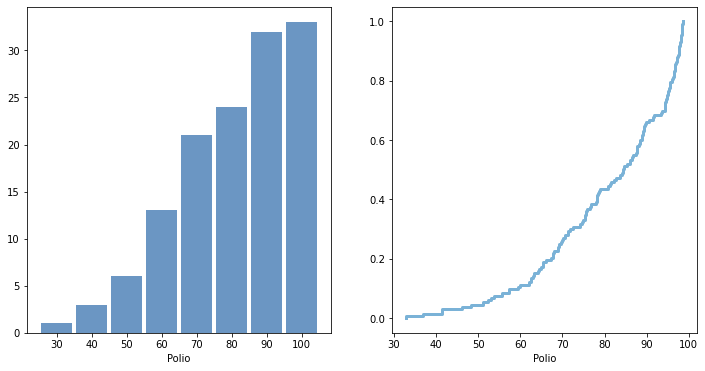

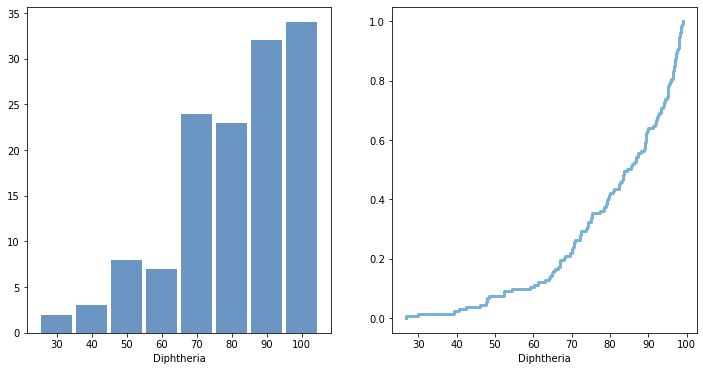

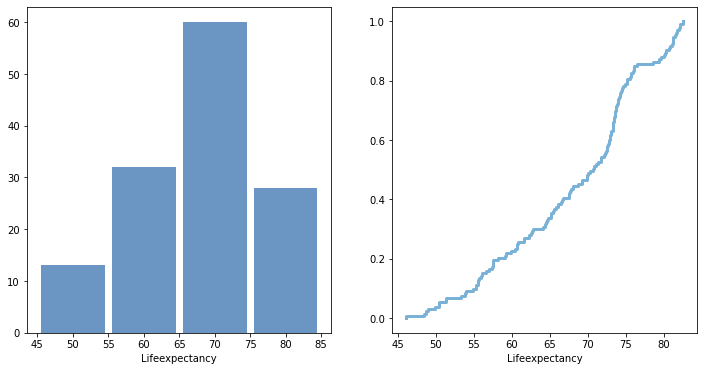

<Figure size 576x432 with 0 Axes>

In [184]:
col2=['HepatitisB','BMI','Polio','Diphtheria', 'Lifeexpectancy']
i=0
while i < len(col2):
    h = col2[i]
    hist=thinkstats2.Hist(round(df[h],-1))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

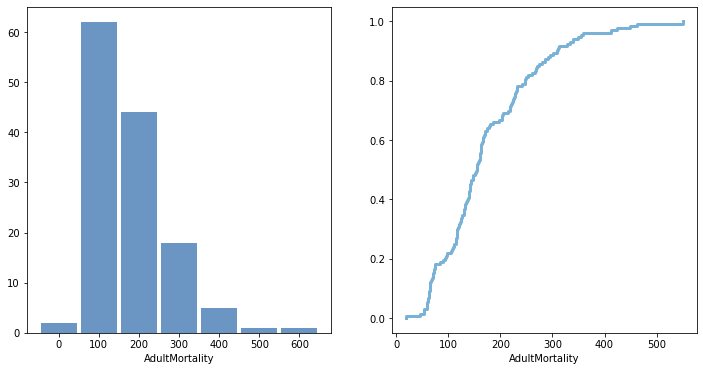

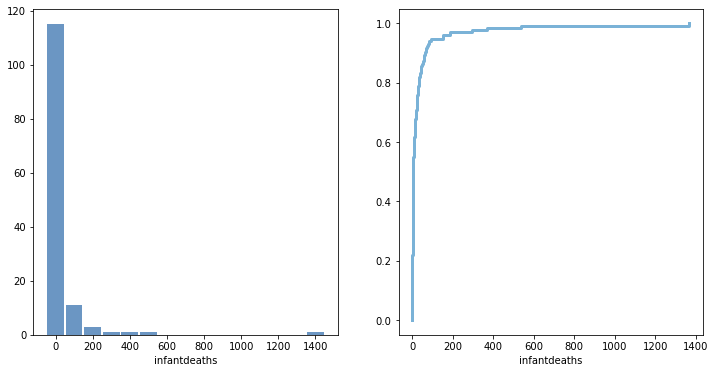

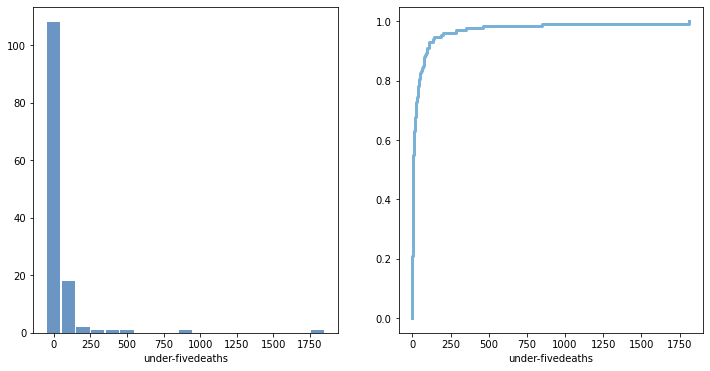

<Figure size 576x432 with 0 Axes>

In [185]:
col3=['AdultMortality','infantdeaths','under-fivedeaths']
i=0
while i < len(col3):
    h = col3[i]
    hist=thinkstats2.Hist(round(df[h],-2))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1


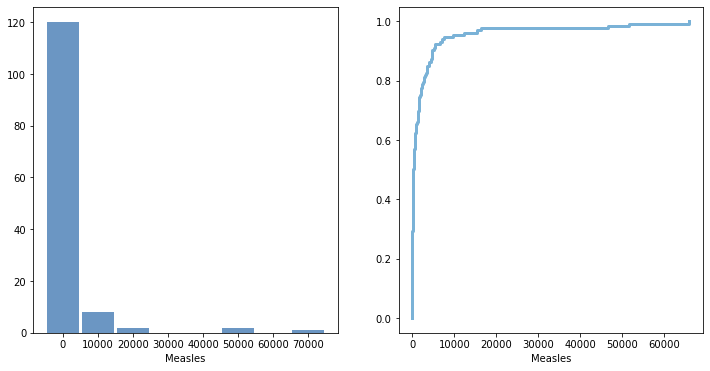

<Figure size 576x432 with 0 Axes>

In [186]:
col4=['Measles']
i=0
while i < len(col4):
    h = col4[i]
    hist=thinkstats2.Hist(round(df[h],-4))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

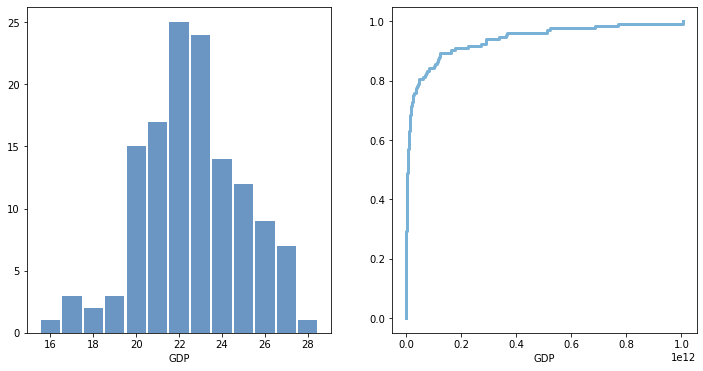

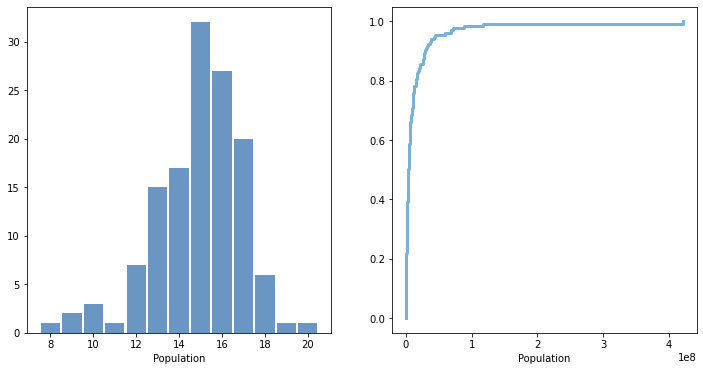

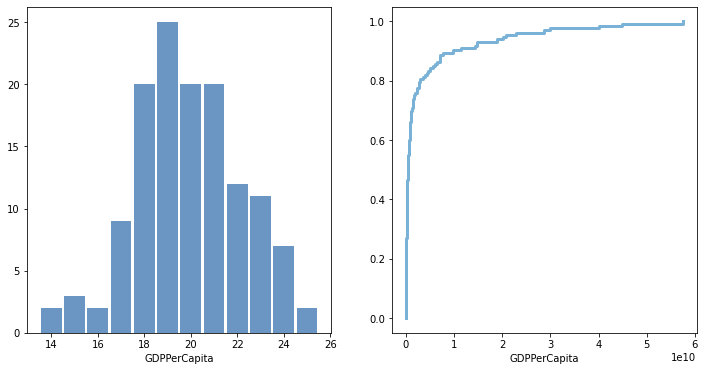

<Figure size 576x432 with 0 Axes>

In [187]:
col5=['GDP','Population','GDPPerCapita']
i=0
while i < len(col5):
    h = (col5[i])
    data = pd.Series(np.log(df[h]))
    hist=thinkstats2.Hist(round(data,0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [188]:
k2, p=ss.normaltest(df["Schooling"])
p

0.8061408621435778

we can not reject the hypothesis that the schooling data is normally distributed

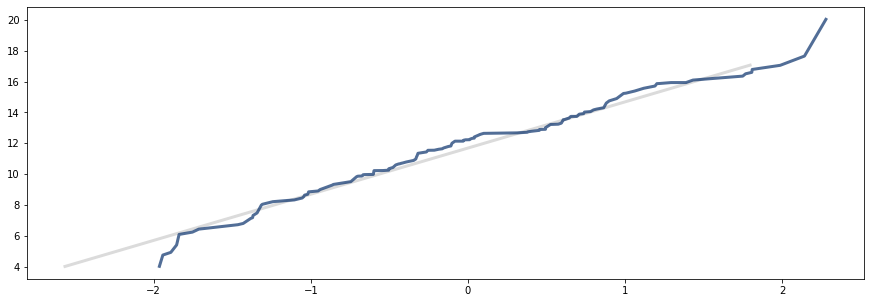

In [189]:
#Analytical for Schooling
thinkstats2.NormalProbabilityPlot(df["Schooling"])


In [190]:
mu = df["Schooling"].mean()
sigma = df["Schooling"].std()
normz = ss.norm(mu, sigma)

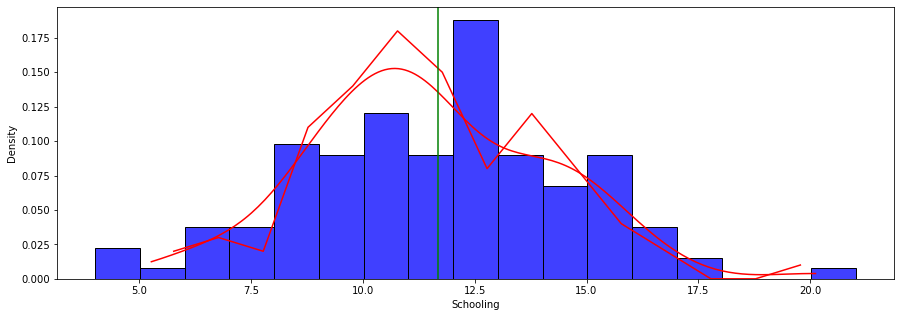

In [191]:
sns.histplot(data=normz.rvs(100), binwidth=1,color='red', stat="density", kde=True, element="poly",fill=False)
sns.histplot(data=df["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(mu, color="green")

In [192]:
percent_above=normz.cdf(16.875)
percent_below=normz.cdf(14.875)
range=percent_above-percent_below
print('The percentage of that have schooling level within  1 year of canada is:', round(range*100,2))


The percentage of that have schooling level within  1 year of canada is: 10.25


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

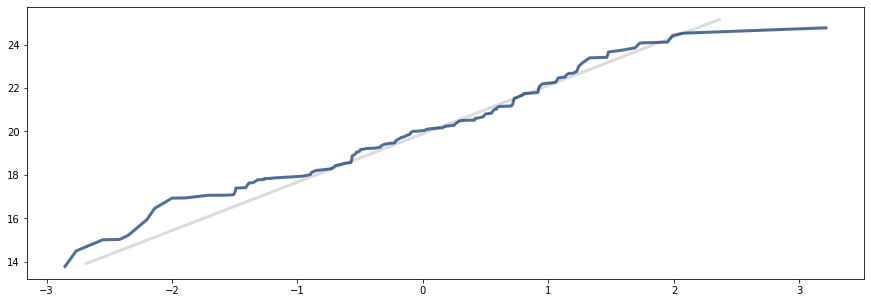

In [193]:
thinkstats2.NormalProbabilityPlot(np.log(df["GDPPerCapita"]))

This data fits a lognormal distribution model

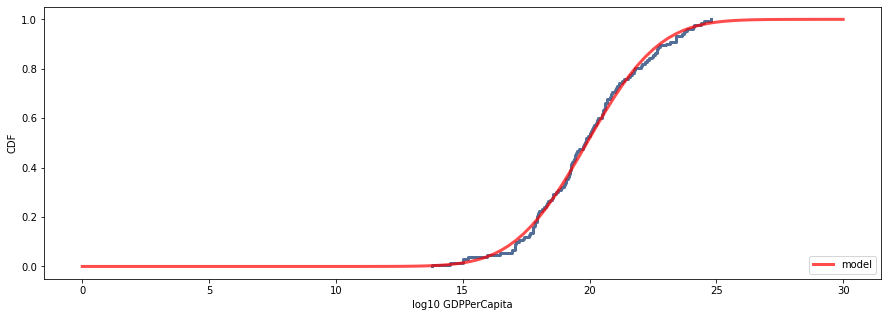

In [194]:

log_GPC=np.log(df["GDPPerCapita"])
cdf_GPC=thinkstats2.Cdf(log_GPC)
thinkplot.Cdf(cdf_GPC) 
mu, sigma = log_GPC.mean(), log_GPC.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=30)
thinkplot.Plot(xs, ps, label='model', color='red')
thinkplot.Config(xlabel='log10 GDPPerCapita', ylabel='CDF', loc='lower right')


The analytical lognormal distribution model seem to accurately represent the GDPPerCapita since the graphs perfectly match each other

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

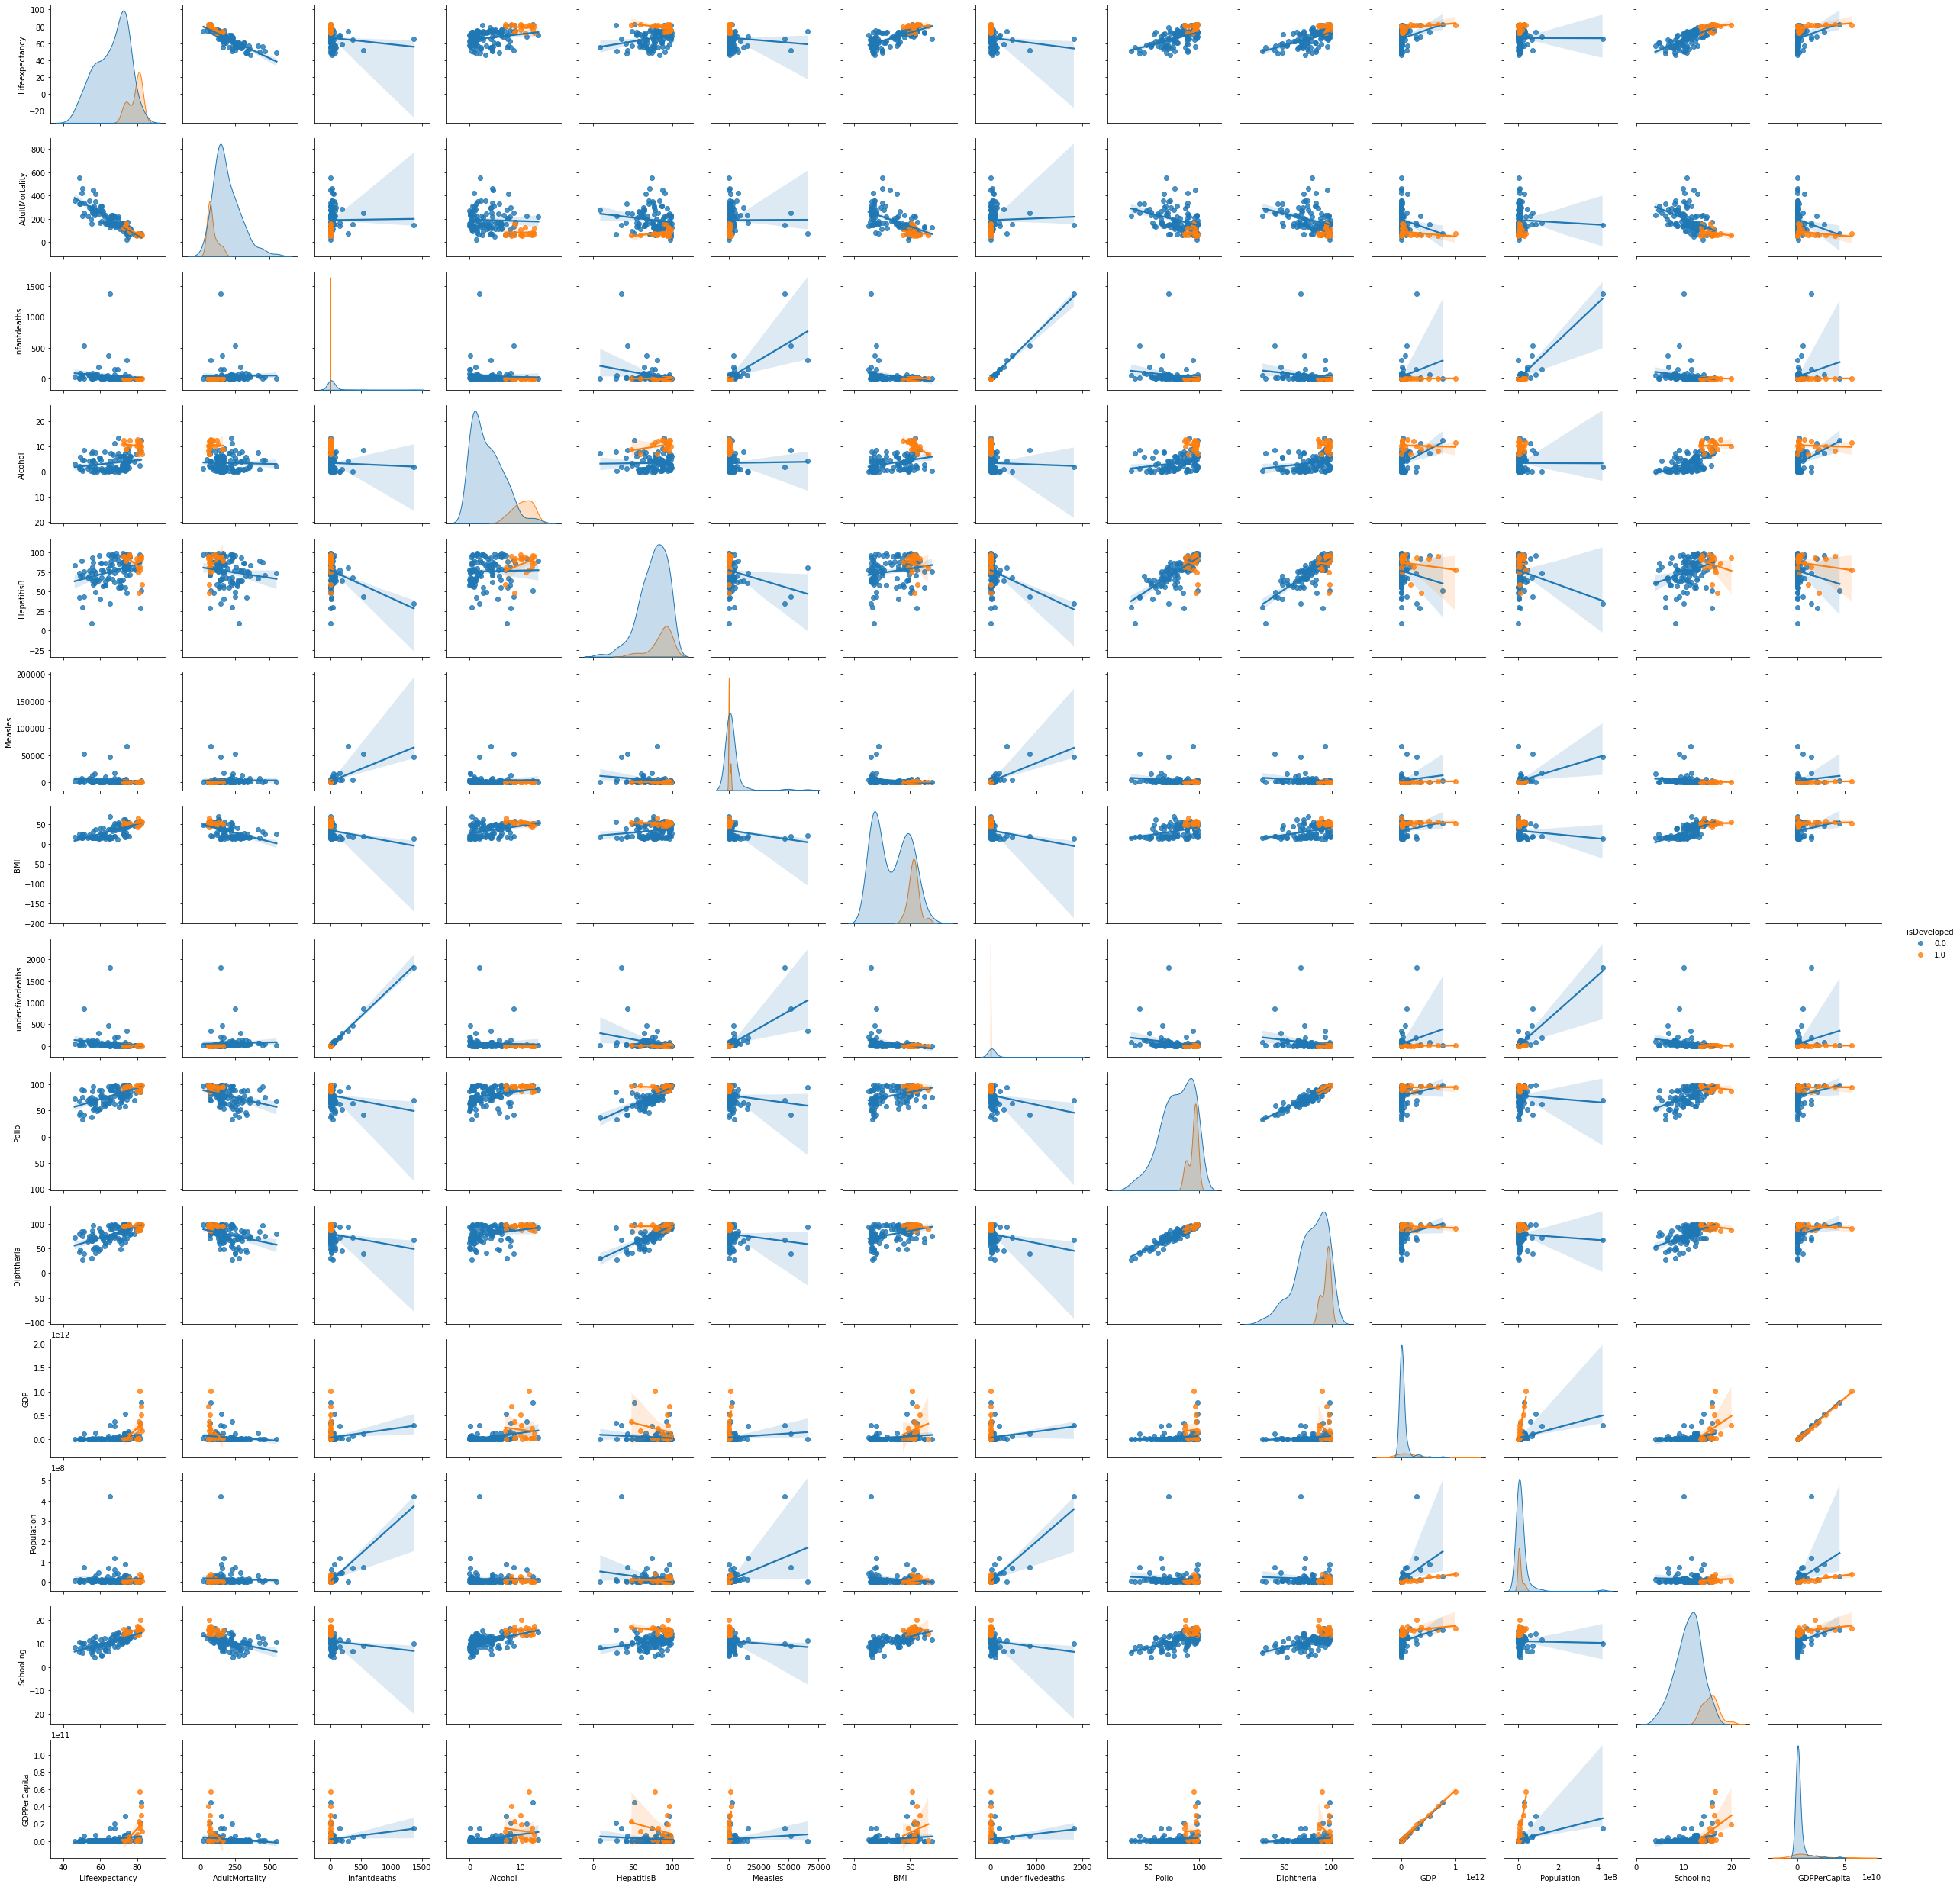

In [195]:
sns.pairplot(df, hue="isDeveloped", kind="reg")

In [197]:

df=df[df['infantdeaths']<200]
df=df[df['under-fivedeaths']<200]
df=df[df['Measles']<10000]
df=df[df['AdultMortality']<500]
df=df[df['GDP']<2.0e+11]
df=df[df['Population']<1e+07]



All these columns were infulenced by outliers that wer way out of line compared to rest of the data. 

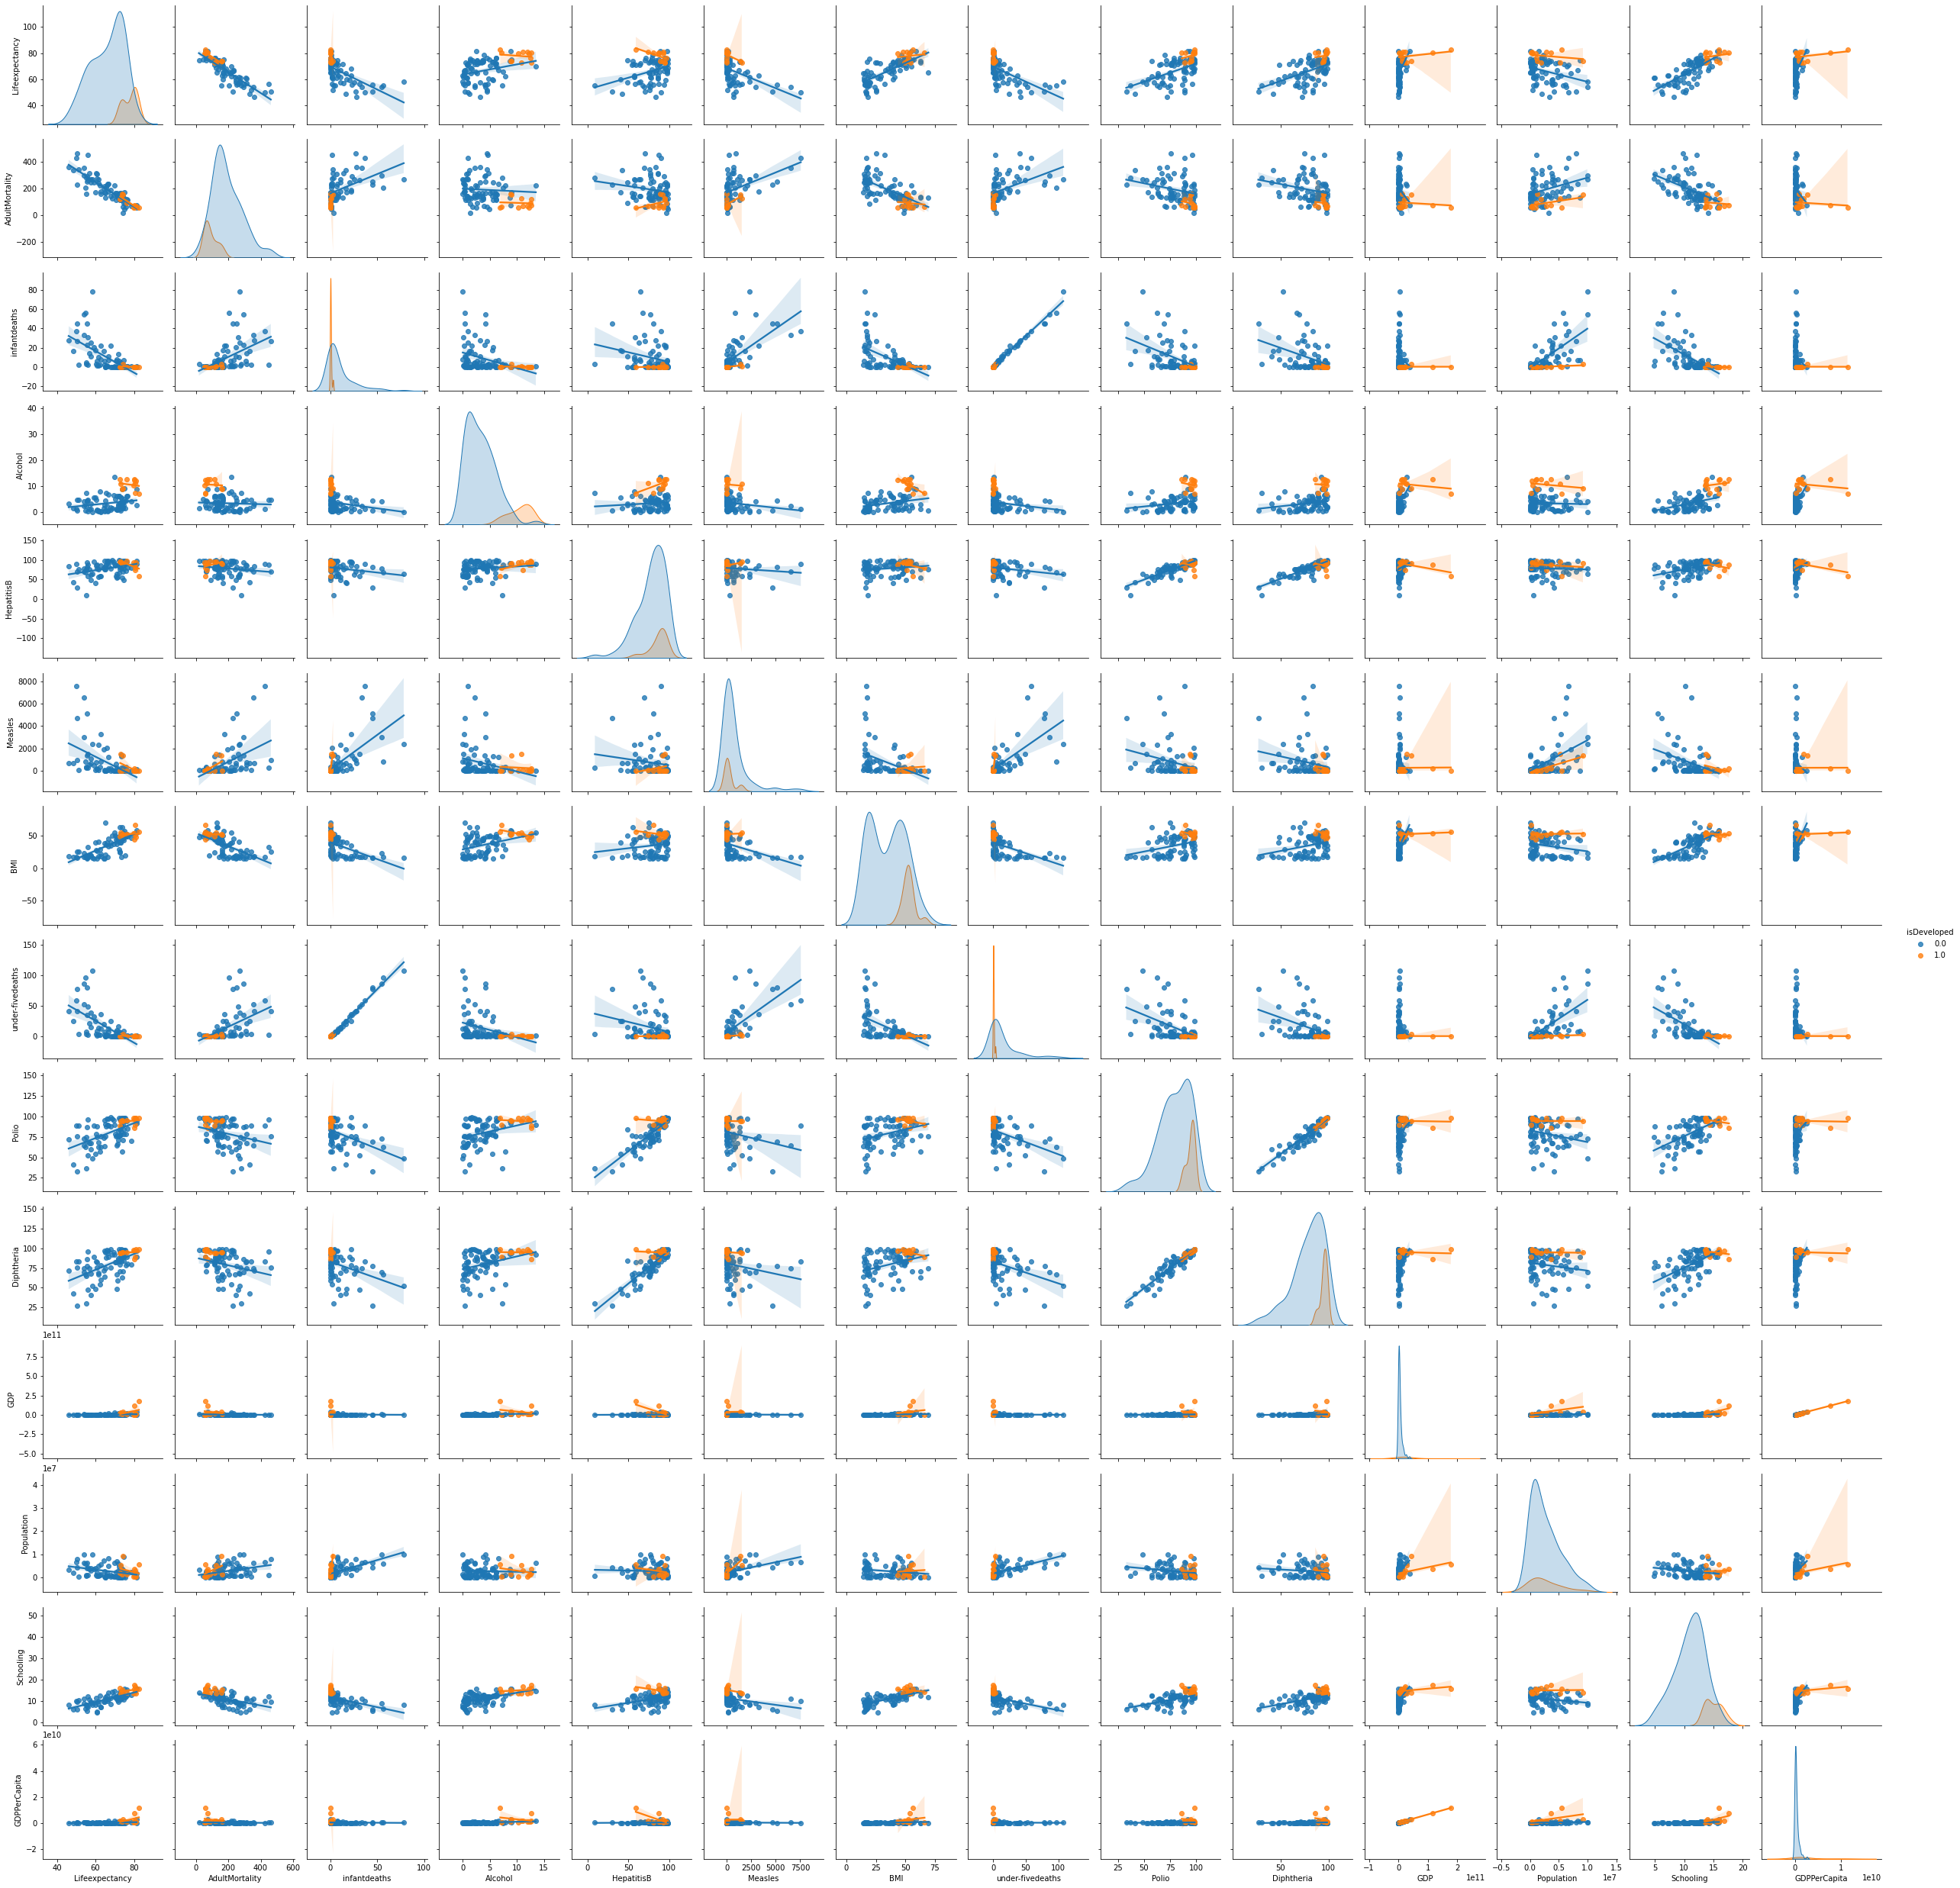

In [198]:
sns.pairplot(df,dropna=True,hue="isDeveloped",kind="reg")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [199]:
#Calculate correlations and analyze. 
df3=df.apply(pd.to_numeric, errors='coerce')
developed=df3[df3['isDeveloped']==1]
developed = developed.drop(columns=["Country","isDeveloped"])
developed = developed.corr()
developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.886108,-0.432990,-0.177916,-0.645036,-0.550675,0.145526,-0.355839,0.253478,0.111331,0.367753,-0.277254,0.238377,0.376321
AdultMortality,-0.886108,1.000000,0.577540,-0.073799,0.409972,0.571650,-0.115743,0.517682,-0.148709,-0.085350,-0.176261,0.463665,-0.130890,-0.186233
infantdeaths,-0.432990,0.577540,1.000000,-0.185278,0.196353,0.832949,-0.027343,0.975696,0.058470,0.014488,-0.007308,0.819064,-0.307152,-0.024159
Alcohol,-0.177916,-0.073799,-0.185278,1.000000,0.604894,-0.085288,-0.678336,-0.155033,-0.179568,-0.040100,-0.286840,-0.263955,0.197713,-0.272237
HepatitisB,-0.645036,0.409972,0.196353,0.604894,1.000000,0.274801,-0.336741,0.113607,-0.223408,-0.120833,-0.679508,-0.198152,-0.437179,-0.675089


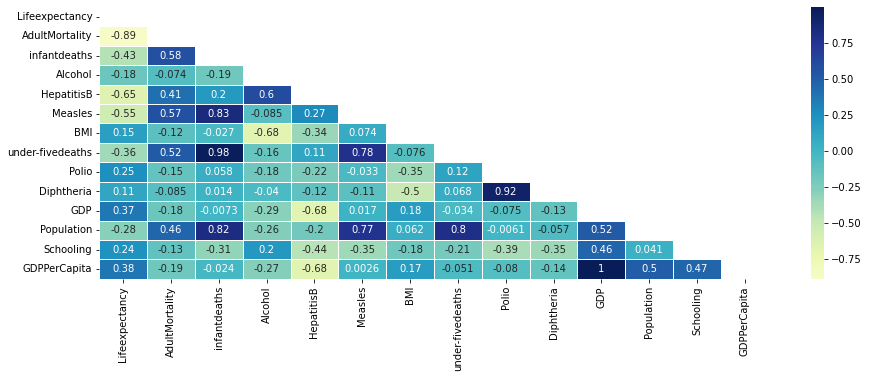

In [200]:
mask = np.triu(np.ones_like(developed, dtype=bool))
sns.heatmap(developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developed countries is strongly correlated to 1)AdultMortality 2)HepetitisB 3)Measles 
These negative correlations seem to be supported by reality the lower the mortality the higher the lifeexpectancy. Lower Hepatitis B and Measles rate due to vacinations in developed countrie increase the lifeexpectancy of the population. 

In [203]:
df3=df.apply(pd.to_numeric, errors='coerce')
not_developed=df3[df3['isDeveloped']==0]
not_developed = not_developed.drop(columns=["Country","isDeveloped"])
not_developed = not_developed.corr()
not_developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.861293,-0.627544,0.242147,0.368982,-0.514508,0.726337,-0.640780,0.503653,0.511504,0.361199,-0.339847,0.736336,0.374002
AdultMortality,-0.861293,1.000000,0.477955,-0.056956,-0.174140,0.465409,-0.614421,0.476504,-0.271027,-0.258844,-0.209628,0.343280,-0.505627,-0.220232
infantdeaths,-0.627544,0.477955,1.000000,-0.279871,-0.227577,0.658559,-0.527822,0.992789,-0.453392,-0.384798,-0.113035,0.698804,-0.554381,-0.130189
Alcohol,0.242147,-0.056956,-0.279871,1.000000,0.116742,-0.221561,0.318077,-0.266668,0.250947,0.255779,0.516917,-0.045652,0.458049,0.524870
HepatitisB,0.368982,-0.174140,-0.227577,0.116742,1.000000,-0.132769,0.168942,-0.237217,0.871579,0.883642,0.162338,-0.053710,0.419748,0.159694


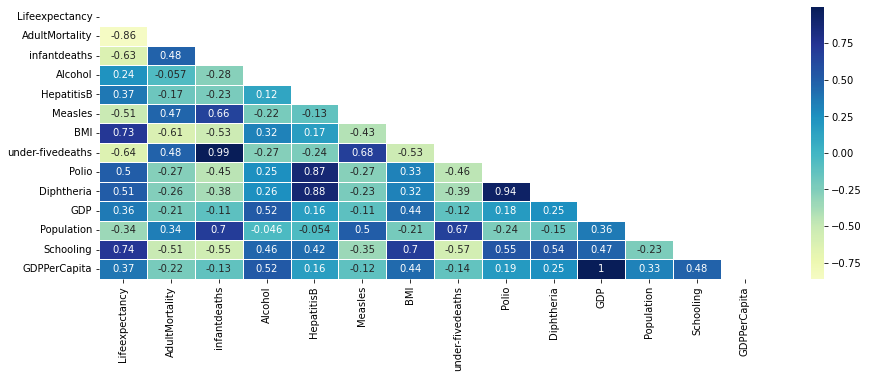

In [204]:
mask = np.triu(np.ones_like(not_developed, dtype=bool))
sns.heatmap(not_developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developing countries is strongly corelated to 1)Adultmortality 2)Schooling 3)BMI
These correlations defenitely make sense lower adultmortallity will result in higher lifeexpectancy. Several studes have asssociated more schooling with better health and longer life. So, it makes makes sence that individuals with higher schooling have longer lifeexpectancy. In developing countries low  BMIs may be the result of low quality diet and malnurishment which will reduce lifeexpectancy.

In [206]:
developed_1=df[df['isDeveloped']==1]
print(developed_1['BMI'].describe())
developed_1['Schooling'].describe()

count    12.000000
mean     52.606250
std       5.412410
min      43.631250
25%      50.478125
50%      52.303125
75%      53.890625
max      66.181250
Name: BMI, dtype: float64


count    12.000000
mean     15.076563
std       1.410941
min      13.518750
25%      13.846875
50%      14.937500
75%      15.978125
max      17.656250
Name: Schooling, dtype: float64

In [207]:
not_developed_1=df[df['isDeveloped']==0]
print(not_developed_1['BMI'].describe())
not_developed_1['Schooling'].describe()

count    79.000000
mean     34.761630
std      15.053720
min      14.550000
25%      18.868750
50%      37.675000
75%      47.528125
max      69.431250
Name: BMI, dtype: float64


count    79.000000
mean     10.957911
std       2.580549
min       4.750000
25%       9.556250
50%      11.212500
75%      12.671875
max      15.937500
Name: Schooling, dtype: float64

The 2 areas where developing and developed countries are sigificantly different are in regards to BMI and Schooling. The heatmap shows that lifeexpectancy is strongly correlated with BMI and Schooling in develping countries while there is no correlation in developed countries. The developed countries have BMIs that are in the morbidly obese ranges while the BMIs for developing countries contains the full spectrum from malnurishment to morbidly obese. Average schooling levels in developed countries includes some college education with the min not dropping below highschool diploma while in developing country education levels are way lower. Better education may be associated with making more money and better diet. We would need to investigte the influence education has on income and BMI in both developing and developed countries. 
